In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
product = pd.read_csv('amazon-web-category-ver4.csv')
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812493 entries, 0 to 812492
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ASIN               812493 non-null  object 
 1   Title              812237 non-null  object 
 2   Rating             808478 non-null  object 
 3   Rating Count       806005 non-null  float64
 4   Bought Last Month  152710 non-null  object 
 5   Category 1         783590 non-null  object 
 6   Category 2         783590 non-null  object 
 7   Category 3         774353 non-null  object 
 8   Category 4         683405 non-null  object 
 9   Category 5         381661 non-null  object 
 10  Category 6         89433 non-null   object 
 11  Category 7         18784 non-null   object 
 12  Category 8         377 non-null     object 
dtypes: float64(1), object(12)
memory usage: 80.6+ MB


In [3]:
product.drop('Bought Last Month', axis = 1, inplace = True)

In [4]:
product.head()

,ASIN,Title,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8
0,000217653X,THE DINAH'S CUPBOARD COOK BOOK: Recipes and Me...,4.6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0002727463,The Steel Bonnets: The Story of the Anglo-Scot...,4.5,578.0,Books,History,Europe,Great Britain,England,NaN,NaN,NaN
2,0005164885,Christmas Eve and Other Stories,4.7,2676.0,CDs & Vinyl,Holiday & Wedding,Christmas,NaN,NaN,NaN,NaN,NaN
3,000647988X,A Game of Thrones: The bestselling classic epi...,4.6,382.0,Books,Literature & Fiction,Genre Fiction,Horror,Dark Fantasy,NaN,NaN,NaN
4,0006546064,Fahrenheit 451,4.6,55737.0,Books,History,Europe,Great Britain,England,NaN,NaN,NaN


In [5]:
purchase = pd.read_csv('amazon-purchases.csv')
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850717 entries, 0 to 1850716
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Order Date                object 
 1   Purchase Price Per Unit   float64
 2   Quantity                  float64
 3   Shipping Address State    object 
 4   Title                     object 
 5   ASIN/ISBN (Product Code)  object 
 6   Category                  object 
 7   Survey ResponseID         object 
dtypes: float64(2), object(6)
memory usage: 113.0+ MB


In [6]:
purchase

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF
2,2018-12-24,8.99,1.0,NJ,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF
3,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF
4,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF
...,...,...,...,...,...,...,...,...
1850712,2021-04-01,6.99,1.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb
1850713,2021-04-14,15.99,1.0,MA,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb
1850714,2021-05-22,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb
1850715,2021-12-01,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb


In [7]:
purchase.isnull().sum()

Order Date                      0
Purchase Price Per Unit         0
Quantity                        0
Shipping Address State      87812
Title                       89740
ASIN/ISBN (Product Code)      973
Category                    89458
Survey ResponseID               0
dtype: int64

In [8]:
purchase.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF
2,2018-12-24,8.99,1.0,NJ,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF
3,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF
4,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF


In [9]:
purchase.drop(['Shipping Address State', 'Quantity'], axis = 1, inplace = True)

In [10]:
purchase.duplicated().sum()

13167

In [11]:
purchase = purchase.drop_duplicates() # 구매주기 계산할때 얘네는 간격이 0이 나와서 왜곡이 생기니까 drop이 맞을듯 (같은날 같은 상품 구매)

In [12]:
purchase.duplicated().sum()

0

In [13]:
purchase.rename(columns={'ASIN/ISBN (Product Code)': 'ASIN'}, inplace=True)

C:\Users\k\AppData\Local\Temp\ipykernel_16792\3035970597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase.rename(columns={'ASIN/ISBN (Product Code)': 'ASIN'}, inplace=True)


In [14]:
purchase.head()

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID
0,2018-12-04,7.98,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF
1,2018-12-22,13.99,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF
2,2018-12-24,8.99,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF
3,2018-12-25,10.45,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF
4,2018-12-25,10.00,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF


In [15]:
purchase.isnull().sum()

Order Date                     0
Purchase Price Per Unit        0
Title                      89422
ASIN                         961
Category                   89144
Survey ResponseID              0
dtype: int64

In [16]:
purchase

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID
0,2018-12-04,7.98,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF
1,2018-12-22,13.99,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF
2,2018-12-24,8.99,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF
3,2018-12-25,10.45,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF
4,2018-12-25,10.00,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF
...,...,...,...,...,...,...
1850712,2021-04-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb
1850713,2021-04-14,15.99,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb
1850714,2021-05-22,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb
1850715,2021-12-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb


In [17]:
transaction = pd.merge(purchase, product.drop('Title', axis = 1), on = 'ASIN', how = 'left')
transaction

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8
0,2018-12-04,7.98,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,4.7,118698.0,Electronics,Computers & Accessories,Computer Accessories & Peripherals,Memory Cards,SD Cards,NaN,NaN,NaN
1,2018-12-22,13.99,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,4.2,26525.0,Electronics,"Headphones, Earbuds & Accessories",Headphones & Earbuds,Earbud Headphones,NaN,NaN,NaN,NaN
2,2018-12-24,8.99,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-25,10.45,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,4.6,908.0,Beauty & Personal Care,Shave & Hair Removal,Men's,Shaving Accessories,Shaving Soap Bowls,NaN,NaN,NaN
4,2018-12-25,10.00,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,4.7,12344.0,Beauty & Personal Care,Shave & Hair Removal,Men's,"Shaving Creams, Lotions & Gels",Shaving Creams,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837545,2021-04-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN
1837546,2021-04-14,15.99,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,4.6,2312.0,Health & Household,Household Supplies,Cleaning Tools,Cleaning Cloths,NaN,NaN,NaN,NaN
1837547,2021-05-22,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN
1837548,2021-12-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN


In [18]:
transaction[transaction['ASIN'].isnull()]

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8
93556,2018-02-08,100.00,Amazon.com eGift Card,NaN,GIFT_XXRD,R_1FPtnyDUi83F045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93557,2020-12-01,5.99,Leg Avenue Women's Lurex Shimmer Anklet Socks,NaN,SOCKS,R_1FPtnyDUi83F045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93558,2020-12-01,36.99,Women's Vintage Bow Tie High Heel Mary Janes P...,NaN,SHOES,R_1FPtnyDUi83F045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93559,2021-08-07,50.00,Amazon eGift Card - Birthday Cupcakes,NaN,GIFT_XXRD,R_1FPtnyDUi83F045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93560,2021-09-08,50.00,Amazon eGift Card - Birthday Cupcakes,NaN,GIFT_XXRD,R_1FPtnyDUi83F045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275767,2023-02-24,17.99,HERBAMAMA Goldenseal Root Capsule Supplement -...,NaN,NaN,R_3lv2H1k8zdvXdkZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275768,2023-03-05,39.99,HOOBUY Printed Sofa Cover Stretch Couch Covers...,NaN,NaN,R_3lv2H1k8zdvXdkZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275769,2023-03-05,29.99,COFACE Womens Fashion Orthotic Flip Flops Ladi...,NaN,NaN,R_3lv2H1k8zdvXdkZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275770,2023-03-06,124.99,"Brightify 40x30 Inch Black Framed Mirror, Blac...",NaN,NaN,R_3lv2H1k8zdvXdkZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
transaction.isnull().sum()

Order Date                       0
Purchase Price Per Unit          0
Title                        89422
ASIN                           961
Category                     89144
Survey ResponseID                0
Rating                      200382
Rating Count                203851
Category 1                  244827
Category 2                  244827
Category 3                  281426
Category 4                  458231
Category 5                 1116721
Category 6                 1690322
Category 7                 1812908
Category 8                 1837087
dtype: int64

In [20]:
transaction['Order Date'] = pd.to_datetime(transaction['Order Date'], format="%Y-%m-%d")
print(transaction['Order Date'].min(), transaction['Order Date'].max())

2018-01-01 00:00:00 2024-08-15 00:00:00


# 카테고리 기준으로 상품군 분류

In [21]:
category_cols = [f'Category {i}' for i in range(1, 9)]
cat_values = transaction[category_cols].values  # numpy 배열로 변환

def fast_group_keys(cat_array):
    keys = []
    for row in cat_array:
        notna = pd.notna(row)
        if not notna.any():
            keys.append('unknown')
        else:
            last_idx = np.where(notna)[0][-1]
            keys.append(tuple(row[:last_idx + 1]))
    return keys

# 그룹 키 생성
transaction['group_key'] = fast_group_keys(cat_values)

In [22]:
transaction['group_key'].value_counts()

group_key
unknown                                                                                                                                                     244827
(Gift Cards, Gift Cards)                                                                                                                                     21781
(Cell Phones & Accessories, Cases, Holsters & Sleeves, Basic Cases)                                                                                          11675
(Pet Supplies, Dogs, Treats, Cookies, Biscuits & Snacks)                                                                                                      6544
(Cell Phones & Accessories, Accessories, Maintenance, Upkeep & Repairs, Screen Protectors)                                                                    6374
                                                                                                                                                             ...  
(Automotive,

## 상품군 결측치 처리

### 기존 구매데이터의 카테고리로 대체
- 기존 구매데이터 카테고리에서 구성비율이 50% 이상인 상품군이 있다면 그 상품군으로 대체

In [23]:
# 크롤링 카테고리 결측치 데이터프레임
catnull = transaction[transaction['Category 1'].isnull()]
catnull

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,group_key
2,2018-12-24,8.99,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
7,2019-03-15,124.99,"Fire HD 8 Tablet (8"" HD Display, 32 GB, withou...",B077H6L7T9,AMAZON_TABLET,R_01vNIayewjIIKMF,4.4,93211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
9,2019-04-23,24.69,NaN,B06XKNWJN2,NaN,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
20,2019-09-06,53.95,WOWMAX Triangular Reading Pillow Large Bolster...,B075CMYT43,BODY_POSITIONER,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
25,2019-09-13,8.95,Poetic SlimFolio case for All-New Amazon Fire ...,B071ZBV7DY,AMAZON_TABLET_ACCESSORY,R_01vNIayewjIIKMF,4.3,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837494,2018-04-01,20.00,WOODROW CAN BLACK,B00S13POIQ,TRASH_CAN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837508,2018-10-09,19.39,WOODROW CAN BLACK,B00S13POIQ,TRASH_CAN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837533,2019-05-04,22.38,NaN,B00BDM0XZG,NaN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837534,2019-05-04,26.96,NaN,B00F5PJ9XE,NaN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown


In [24]:
catnull[catnull['Category'].notnull()] # 그중에서 구매데이터 카테고리는 결측치 아닌 것들

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,group_key
7,2019-03-15,124.99,"Fire HD 8 Tablet (8"" HD Display, 32 GB, withou...",B077H6L7T9,AMAZON_TABLET,R_01vNIayewjIIKMF,4.4,93211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
20,2019-09-06,53.95,WOWMAX Triangular Reading Pillow Large Bolster...,B075CMYT43,BODY_POSITIONER,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
25,2019-09-13,8.95,Poetic SlimFolio case for All-New Amazon Fire ...,B071ZBV7DY,AMAZON_TABLET_ACCESSORY,R_01vNIayewjIIKMF,4.3,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
74,2020-05-28,8.54,Amazon Basics Carrying Case for Nintendo Switc...,B072PW59TZ,PORTABLE_ELECTRONIC_DEVICE_COVER,R_01vNIayewjIIKMF,4.6,2972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
76,2020-05-28,9.29,UGREEN SD Card Reader USB 3.0 Memory Card Read...,B07VDDDPKY,MEMORY_CARD_READER,R_01vNIayewjIIKMF,4.6,1237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837426,2022-10-20,6.32,Little Blue Truck's Halloween: A Halloween Boo...,544772539,ABIS_BOOK,R_zfnsck2ZatnGtY5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837451,2022-12-18,15.29,Bob Ross: A Happy Little Day-to-Day 2023 Calendar,789342022,ABIS_BOOK,R_zfnsck2ZatnGtY5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837494,2018-04-01,20.00,WOODROW CAN BLACK,B00S13POIQ,TRASH_CAN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837508,2018-10-09,19.39,WOODROW CAN BLACK,B00S13POIQ,TRASH_CAN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown


In [25]:
# 1. group_key 기준 전체 건수 (unknown 포함)
count_df = transaction.groupby(['Category', 'group_key']).size().reset_index(name='count')

# 2. total_with_unknown: 전체 group_key 합계
total_with_unknown = count_df.groupby('Category')['count'].sum().reset_index(name='total_with_unknown')

# 3. total_without_unknown: unknown 제외하고 합계
known_only = count_df[count_df['group_key'] != 'unknown']
total_without_unknown = known_only.groupby('Category')['count'].sum().reset_index(name='total_without_unknown')

# 4. 전체 데이터에 두 total 붙이기
count_df = count_df.merge(total_with_unknown, on='Category', how='left')
count_df = count_df.merge(total_without_unknown, on='Category', how='left')

# 5. 비율 계산 (unknown 제외한 비율)
count_df['ratio_excl_unknown'] = count_df['count'] / count_df['total_without_unknown'] * 100

# 6. group_key가 unknown이 아닌 것 중 최대 비율 추출
top_ratio_df = count_df[count_df['group_key'] != 'unknown'] \
    .sort_values(['Category', 'ratio_excl_unknown'], ascending=[True, False]) \
    .drop_duplicates('Category')

In [26]:
top_ratio_df

,Category,group_key,count,total_with_unknown,total_without_unknown,ratio_excl_unknown
0,3D_GLASSES,"(Electronics, Television & Video, Accessories,...",1,1,1.0,100.000000
5,3D_PRINTER,"(Industrial & Scientific, Additive Manufacturi...",57,208,181.0,31.491713
12,3D_PRINTING_PEN,"(Industrial & Scientific, Additive Manufacturi...",6,6,6.0,100.000000
29,ABDOMINAL_EXERCISER,"(Sports & Outdoors, Exercise & Fitness, Streng...",85,178,167.0,50.898204
43,ABIS_APPAREL,"(Clothing, Shoes & Jewelry, Men, Clothing, Shi...",2,3,3.0,66.666667
...,...,...,...,...,...,...
77347,Wireless Phone Accessory,"(Cell Phones & Accessories, Cases, Holsters & ...",1,3,2.0,50.000000
77360,YARN,"(Arts, Crafts & Sewing, Knitting & Crochet, Yarn)",755,1369,1271.0,59.402046
77392,YO_YO,"(Toys & Games, Sports & Outdoor Play, Yo-yos)",72,78,74.0,97.297297
77395,ZENER_DIODE,"(Industrial & Scientific, Industrial Electrica...",1,1,1.0,100.000000


In [27]:
# 특정 상품군 비율이 50% 이상인 카테고리들
# 비율 계산할때 특정 상품군이 unknown인 케이스들은 분모에서부터 제외
top_ratio_df[top_ratio_df['ratio_excl_unknown'] >= 50]

,Category,group_key,count,total_with_unknown,total_without_unknown,ratio_excl_unknown
0,3D_GLASSES,"(Electronics, Television & Video, Accessories,...",1,1,1.0,100.000000
12,3D_PRINTING_PEN,"(Industrial & Scientific, Additive Manufacturi...",6,6,6.0,100.000000
29,ABDOMINAL_EXERCISER,"(Sports & Outdoors, Exercise & Fitness, Streng...",85,178,167.0,50.898204
43,ABIS_APPAREL,"(Clothing, Shoes & Jewelry, Men, Clothing, Shi...",2,3,3.0,66.666667
44,ABIS_BABY_PRODUCT,"(Baby Products, Diapering, Cloth Diapers & Acc...",1,2,2.0,50.000000
...,...,...,...,...,...,...
77347,Wireless Phone Accessory,"(Cell Phones & Accessories, Cases, Holsters & ...",1,3,2.0,50.000000
77360,YARN,"(Arts, Crafts & Sewing, Knitting & Crochet, Yarn)",755,1369,1271.0,59.402046
77392,YO_YO,"(Toys & Games, Sports & Outdoor Play, Yo-yos)",72,78,74.0,97.297297
77395,ZENER_DIODE,"(Industrial & Scientific, Industrial Electrica...",1,1,1.0,100.000000


In [28]:
# 0. group_key가 'unknown'인 마스크 정의
mask_unknown = transaction['group_key'] == 'unknown'

# 1. 대체용 mapping 테이블 만들기
replace_map = top_ratio_df[top_ratio_df['ratio_excl_unknown'] >= 50][['Category', 'group_key']]
replace_map = replace_map.rename(columns={'group_key': 'replacement_key'})

# 2. unknown 행 복사 + 인덱스 유지
transaction_unknown = transaction[mask_unknown].copy()

# 3. merge는 index 유지한 채 Category 기준 left join
transaction_unknown = transaction_unknown.merge(replace_map, on='Category', how='left')

# 4. replacement_key가 존재하는 경우만 대체
transaction.loc[mask_unknown, 'group_key'] = transaction_unknown['replacement_key'].fillna('unknown').values


In [29]:
transaction.isnull().sum()

Order Date                       0
Purchase Price Per Unit          0
Title                        89422
ASIN                           961
Category                     89144
Survey ResponseID                0
Rating                      200382
Rating Count                203851
Category 1                  244827
Category 2                  244827
Category 3                  281426
Category 4                  458231
Category 5                 1116721
Category 6                 1690322
Category 7                 1812908
Category 8                 1837087
group_key                        0
dtype: int64

In [30]:
transaction.loc[mask_unknown, 'group_key'].value_counts() # 카테고리 결측치 중 4만개정도가 채워짐

group_key
unknown                                                                                                                                 200408
(Gift Cards, Gift Cards)                                                                                                                  8607
(Cell Phones & Accessories, Cases, Holsters & Sleeves, Basic Cases)                                                                       2241
(Electronics, Power Accessories, AC Adapters)                                                                                             1617
(Cell Phones & Accessories, Accessories, Maintenance, Upkeep & Repairs, Screen Protectors)                                                 671
                                                                                                                                         ...  
(Automotive, Replacement Parts, Caps, Fuel Tank Caps)                                                                               

### 상품군 결측치 비율이 너무 높은 유저 제거

In [31]:
user_catnull = transaction[transaction['group_key'] == 'unknown']['Survey ResponseID'].value_counts().sort_values(ascending = False).reset_index()
user_catnull = user_catnull.rename(columns = {'count' : 'count_catnull'})
user_catnull

,Survey ResponseID,count_catnull
0,R_3qTFp0FJqUeMhVZ,869
1,R_8CXcySQawXPuJwJ,812
2,R_3m3H4mwZ2snYFua,575
3,R_3mmCGclG1nJL4uv,531
4,R_3n2VXT4Z99FpnEG,504
...,...,...
4907,R_3jYVHJu0dN2OgpR,1
4908,R_1iaq7FI2JEgb6pO,1
4909,R_3HhuhQG33UHsk0S,1
4910,R_1ikRVsVdVf29YNF,1


In [32]:
user_all = transaction['Survey ResponseID'].value_counts().sort_values(ascending = False).reset_index()
user_all = user_all.rename(columns = {'count' : 'count_all'})
user_all

,Survey ResponseID,count_all
0,R_8CXcySQawXPuJwJ,5377
1,R_24csoaO569P4Yzz,4731
2,R_2EglJpTWGEiwQYa,4259
3,R_3e5g4lvddcnjkoZ,3891
4,R_1QtQEfi1VAWgRM0,3859
...,...,...
5022,R_3EcHXiW1yKkyjDP,2
5023,R_1GxbsZQY6mAp3qv,2
5024,R_3oXeN7LsUxJ1Jco,2
5025,R_w4X9FQneeSrzuE1,2


In [33]:
user_merge = pd.merge(user_all, user_catnull, on = 'Survey ResponseID', how = 'left')
user_merge['count_catnull'] = user_merge['count_catnull'].fillna(0)
user_merge

,Survey ResponseID,count_all,count_catnull
0,R_8CXcySQawXPuJwJ,5377,812.0
1,R_24csoaO569P4Yzz,4731,343.0
2,R_2EglJpTWGEiwQYa,4259,469.0
3,R_3e5g4lvddcnjkoZ,3891,300.0
4,R_1QtQEfi1VAWgRM0,3859,478.0
...,...,...,...
5022,R_3EcHXiW1yKkyjDP,2,0.0
5023,R_1GxbsZQY6mAp3qv,2,0.0
5024,R_3oXeN7LsUxJ1Jco,2,0.0
5025,R_w4X9FQneeSrzuE1,2,0.0


In [34]:
user_merge['BuyNull_per'] = user_merge['count_catnull'] / user_merge['count_all']
user_merge.sort_values(by='BuyNull_per', ascending = False)

,Survey ResponseID,count_all,count_catnull,BuyNull_per
1735,R_3lv2H1k8zdvXdkZ,361,361.0,1.000000
5005,R_xr5emnVfUGhwjkd,3,3.0,1.000000
4906,R_1FPtnyDUi83F045,10,10.0,1.000000
3758,R_3k1YkypUNn2zXzH,92,80.0,0.869565
3388,R_3DqnvnWvqgEZVbO,127,103.0,0.811024
...,...,...,...,...
4896,R_1GCwpR4TbUNRunu,11,0.0,0.000000
4897,R_2CWyXLZNxMXT6xY,11,0.0,0.000000
4898,R_1N52McSjcCnVqIm,11,0.0,0.000000
4902,R_vpDykvpWlejUcut,11,0.0,0.000000


<Axes: ylabel='BuyNull_per'>

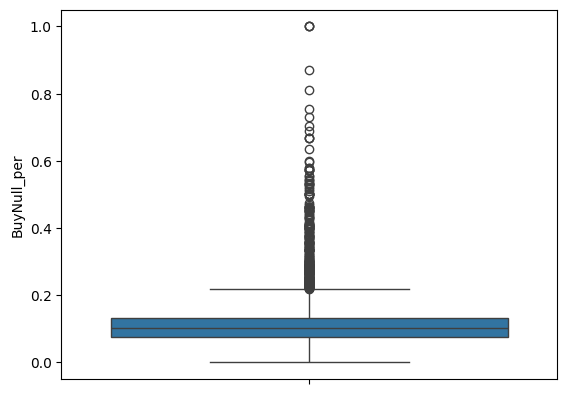

In [35]:
sns.boxplot(user_merge['BuyNull_per'])

In [36]:
# 구매비율 IQR 이상치 경계값 계산

q1 = user_merge['BuyNull_per'].quantile(0.25)
q3 = user_merge['BuyNull_per'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"하한값 (lower bound): {lower_bound}")
print(f"상한값 (upper bound): {upper_bound}")

하한값 (lower bound): -0.010993794945954358
상한값 (upper bound): 0.2191598116602726


In [37]:
user_filtered = user_merge[user_merge['BuyNull_per'] <= upper_bound]
user_filtered

,Survey ResponseID,count_all,count_catnull,BuyNull_per
0,R_8CXcySQawXPuJwJ,5377,812.0,0.151014
1,R_24csoaO569P4Yzz,4731,343.0,0.072501
2,R_2EglJpTWGEiwQYa,4259,469.0,0.110120
3,R_3e5g4lvddcnjkoZ,3891,300.0,0.077101
4,R_1QtQEfi1VAWgRM0,3859,478.0,0.123866
...,...,...,...,...
5022,R_3EcHXiW1yKkyjDP,2,0.0,0.000000
5023,R_1GxbsZQY6mAp3qv,2,0.0,0.000000
5024,R_3oXeN7LsUxJ1Jco,2,0.0,0.000000
5025,R_w4X9FQneeSrzuE1,2,0.0,0.000000


In [38]:
# 시퀀스 길이가 6 미만인 유저 제거
user_over6 = user_filtered[user_filtered['count_all'] >= 6]
user_over6

,Survey ResponseID,count_all,count_catnull,BuyNull_per
0,R_8CXcySQawXPuJwJ,5377,812.0,0.151014
1,R_24csoaO569P4Yzz,4731,343.0,0.072501
2,R_2EglJpTWGEiwQYa,4259,469.0,0.110120
3,R_3e5g4lvddcnjkoZ,3891,300.0,0.077101
4,R_1QtQEfi1VAWgRM0,3859,478.0,0.123866
...,...,...,...,...
4972,R_1Ld1FGLTStOykIS,6,1.0,0.166667
4973,R_4GBxHAFAuFgUue5,6,0.0,0.000000
4975,R_XvMiL2k9rLcEJsB,6,0.0,0.000000
4976,R_eJOowyeZRgy7nTH,6,1.0,0.166667


In [39]:
transaction_filtered = transaction[transaction['Survey ResponseID'].isin(user_over6['Survey ResponseID'])]
transaction_filtered

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,group_key
0,2018-12-04,7.98,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,4.7,118698.0,Electronics,Computers & Accessories,Computer Accessories & Peripherals,Memory Cards,SD Cards,NaN,NaN,NaN,"(Electronics, Computers & Accessories, Compute..."
1,2018-12-22,13.99,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,4.2,26525.0,Electronics,"Headphones, Earbuds & Accessories",Headphones & Earbuds,Earbud Headphones,NaN,NaN,NaN,NaN,"(Electronics, Headphones, Earbuds & Accessorie..."
2,2018-12-24,8.99,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
3,2018-12-25,10.45,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,4.6,908.0,Beauty & Personal Care,Shave & Hair Removal,Men's,Shaving Accessories,Shaving Soap Bowls,NaN,NaN,NaN,"(Beauty & Personal Care, Shave & Hair Removal,..."
4,2018-12-25,10.00,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,4.7,12344.0,Beauty & Personal Care,Shave & Hair Removal,Men's,"Shaving Creams, Lotions & Gels",Shaving Creams,NaN,NaN,NaN,"(Beauty & Personal Care, Shave & Hair Removal,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837545,2021-04-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN,"(Health & Household, Oral Care, Baby & Child D..."
1837546,2021-04-14,15.99,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,4.6,2312.0,Health & Household,Household Supplies,Cleaning Tools,Cleaning Cloths,NaN,NaN,NaN,NaN,"(Health & Household, Household Supplies, Clean..."
1837547,2021-05-22,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN,"(Health & Household, Oral Care, Baby & Child D..."
1837548,2021-12-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN,"(Health & Household, Oral Care, Baby & Child D..."


In [40]:
transaction_filtered[transaction_filtered['group_key'] == 'unknown'] # 이래도 남아있는 카테고리 결측치 개수가 약 18만개

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,group_key
2,2018-12-24,8.99,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
7,2019-03-15,124.99,"Fire HD 8 Tablet (8"" HD Display, 32 GB, withou...",B077H6L7T9,AMAZON_TABLET,R_01vNIayewjIIKMF,4.4,93211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
9,2019-04-23,24.69,NaN,B06XKNWJN2,NaN,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
20,2019-09-06,53.95,WOWMAX Triangular Reading Pillow Large Bolster...,B075CMYT43,BODY_POSITIONER,R_01vNIayewjIIKMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
25,2019-09-13,8.95,Poetic SlimFolio case for All-New Amazon Fire ...,B071ZBV7DY,AMAZON_TABLET_ACCESSORY,R_01vNIayewjIIKMF,4.3,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837494,2018-04-01,20.00,WOODROW CAN BLACK,B00S13POIQ,TRASH_CAN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837508,2018-10-09,19.39,WOODROW CAN BLACK,B00S13POIQ,TRASH_CAN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837533,2019-05-04,22.38,NaN,B00BDM0XZG,NaN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
1837534,2019-05-04,26.96,NaN,B00F5PJ9XE,NaN,R_zfqnsBzlOAKibzb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown


### 아직까지 남아있는 상품군 결측치는 드랍 (ASIN ID 제거)

In [41]:
transaction_known = transaction_filtered[transaction_filtered['group_key'] != 'unknown']
transaction_known

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID,Rating,Rating Count,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,group_key
0,2018-12-04,7.98,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,4.7,118698.0,Electronics,Computers & Accessories,Computer Accessories & Peripherals,Memory Cards,SD Cards,NaN,NaN,NaN,"(Electronics, Computers & Accessories, Compute..."
1,2018-12-22,13.99,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,4.2,26525.0,Electronics,"Headphones, Earbuds & Accessories",Headphones & Earbuds,Earbud Headphones,NaN,NaN,NaN,NaN,"(Electronics, Headphones, Earbuds & Accessorie..."
3,2018-12-25,10.45,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,4.6,908.0,Beauty & Personal Care,Shave & Hair Removal,Men's,Shaving Accessories,Shaving Soap Bowls,NaN,NaN,NaN,"(Beauty & Personal Care, Shave & Hair Removal,..."
4,2018-12-25,10.00,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,4.7,12344.0,Beauty & Personal Care,Shave & Hair Removal,Men's,"Shaving Creams, Lotions & Gels",Shaving Creams,NaN,NaN,NaN,"(Beauty & Personal Care, Shave & Hair Removal,..."
5,2019-02-18,10.99,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,4.5,25562.0,Electronics,Computers & Accessories,Computer Accessories & Peripherals,Cables & Accessories,Cables & Interconnects,USB Cables,NaN,NaN,"(Electronics, Computers & Accessories, Compute..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837545,2021-04-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN,"(Health & Household, Oral Care, Baby & Child D..."
1837546,2021-04-14,15.99,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,4.6,2312.0,Health & Household,Household Supplies,Cleaning Tools,Cleaning Cloths,NaN,NaN,NaN,NaN,"(Health & Household, Household Supplies, Clean..."
1837547,2021-05-22,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN,"(Health & Household, Oral Care, Baby & Child D..."
1837548,2021-12-01,6.99,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,4.6,4304.0,Health & Household,Oral Care,Baby & Child Dental Care,Children's Dental Care,Toothpaste,NaN,NaN,NaN,"(Health & Household, Oral Care, Baby & Child D..."


In [42]:
transaction_filtered[transaction_filtered['group_key'] != 'unknown'].isnull().sum()

Order Date                       0
Purchase Price Per Unit          0
Title                            2
ASIN                             0
Category                       217
Survey ResponseID                0
Rating                       31248
Rating Count                 34201
Category 1                   39119
Category 2                   39119
Category 3                   74479
Category 4                  246927
Category 5                  889416
Category 6                 1449198
Category 7                 1568978
Category 8                 1592619
group_key                        0
dtype: int64

In [43]:
transaction_known = transaction_known[['Order Date', 'ASIN', 'group_key', 'Survey ResponseID']].rename(columns = {'ASIN' : 'ASIN/ISBN (Product Code)', 'group_key' : 'Category'})
transaction_known

,Order Date,ASIN/ISBN (Product Code),Category,Survey ResponseID
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF
1,2018-12-22,B01MA1MJ6H,"(Electronics, Headphones, Earbuds & Accessorie...",R_01vNIayewjIIKMF
3,2018-12-25,B06XWF9HML,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
4,2018-12-25,B00837ZOI0,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
5,2019-02-18,B01GFB2E9M,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF
...,...,...,...,...
1837545,2021-04-01,B015ZRTHVA,"(Health & Household, Oral Care, Baby & Child D...",R_zfqnsBzlOAKibzb
1837546,2021-04-14,B00QGCXPRG,"(Health & Household, Household Supplies, Clean...",R_zfqnsBzlOAKibzb
1837547,2021-05-22,B015ZRTHVA,"(Health & Household, Oral Care, Baby & Child D...",R_zfqnsBzlOAKibzb
1837548,2021-12-01,B015ZRTHVA,"(Health & Household, Oral Care, Baby & Child D...",R_zfqnsBzlOAKibzb


In [44]:
transaction_known.to_csv('transaction_categorized.csv', index = False)

In [45]:
transaction_known

,Order Date,ASIN/ISBN (Product Code),Category,Survey ResponseID
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF
1,2018-12-22,B01MA1MJ6H,"(Electronics, Headphones, Earbuds & Accessorie...",R_01vNIayewjIIKMF
3,2018-12-25,B06XWF9HML,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
4,2018-12-25,B00837ZOI0,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
5,2019-02-18,B01GFB2E9M,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF
...,...,...,...,...
1837545,2021-04-01,B015ZRTHVA,"(Health & Household, Oral Care, Baby & Child D...",R_zfqnsBzlOAKibzb
1837546,2021-04-14,B00QGCXPRG,"(Health & Household, Household Supplies, Clean...",R_zfqnsBzlOAKibzb
1837547,2021-05-22,B015ZRTHVA,"(Health & Household, Oral Care, Baby & Child D...",R_zfqnsBzlOAKibzb
1837548,2021-12-01,B015ZRTHVA,"(Health & Household, Oral Care, Baby & Child D...",R_zfqnsBzlOAKibzb


In [46]:
transaction_known['ASIN/ISBN (Product Code)'].value_counts()

ASIN/ISBN (Product Code)
B00IX1I3G6    7995
B086KKT3RX    4726
B07PCMWTSG    1244
B004LLIKVU    1147
B074T91QTZ     755
              ... 
B004A9U5GG       1
B002GIVEZO       1
B07WSVKXGS       1
B002H02JSM       1
B00QGCXPRG       1
Name: count, Length: 791451, dtype: int64

In [47]:
transaction_known.head()

,Order Date,ASIN/ISBN (Product Code),Category,Survey ResponseID
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF
1,2018-12-22,B01MA1MJ6H,"(Electronics, Headphones, Earbuds & Accessorie...",R_01vNIayewjIIKMF
3,2018-12-25,B06XWF9HML,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
4,2018-12-25,B00837ZOI0,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
5,2019-02-18,B01GFB2E9M,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF


# 상품군별 구매주기 구하기 (평균, 중앙값 등)

In [48]:
purchase.head()

,Order Date,Purchase Price Per Unit,Title,ASIN,Category,Survey ResponseID
0,2018-12-04,7.98,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF
1,2018-12-22,13.99,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF
2,2018-12-24,8.99,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF
3,2018-12-25,10.45,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF
4,2018-12-25,10.00,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF


In [116]:
df = transaction_known.copy()
df.rename(columns = {'ASIN/ISBN (Product Code)' : 'ASIN'}, inplace = True)
df.head()

,Order Date,ASIN,Category,Survey ResponseID
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF
1,2018-12-22,B01MA1MJ6H,"(Electronics, Headphones, Earbuds & Accessorie...",R_01vNIayewjIIKMF
3,2018-12-25,B06XWF9HML,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
4,2018-12-25,B00837ZOI0,"(Beauty & Personal Care, Shave & Hair Removal,...",R_01vNIayewjIIKMF
5,2019-02-18,B01GFB2E9M,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF


In [117]:
purchase_unique = purchase[['ASIN', 'Category']].drop_duplicates(subset='ASIN')
purchase_unique = purchase_unique.rename(columns={'Category': 'Category_Origin'})
purchase_unique

,ASIN,Category_Origin
0,B0143RTB1E,FLASH_MEMORY
1,B01MA1MJ6H,HEADPHONES
2,B078JZTFN3,NaN
3,B06XWF9HML,DISHWARE_BOWL
4,B00837ZOI0,SHAVING_AGENT
...,...,...
1850702,0674362810,ABIS_BOOK
1850703,B0000Y7L7G,BISS
1850706,0807057932,ABIS_BOOK
1850709,B085WXGMWG,CAMCORDER


In [118]:
df = df.merge(purchase_unique, on = 'ASIN', how = 'inner')
df

,Order Date,ASIN,Category,Survey ResponseID,Category_Origin
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF,FLASH_MEMORY
1,2018-04-22,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1LYvldXrvEt6Cel,FLASH_MEMORY
2,2020-01-10,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1QoPHtffEy2UzWJ,FLASH_MEMORY
3,2018-02-27,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1q4eVtHN10S5gPB,FLASH_MEMORY
4,2018-10-06,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1rpKvwP7VAtzJqH,FLASH_MEMORY
...,...,...,...,...,...
1593070,2019-06-04,0674362810,"(Books, History, World, Religious, General)",R_zfqnsBzlOAKibzb,ABIS_BOOK
1593071,2019-06-04,B0000Y7L7G,"(Home & Kitchen, Kitchen & Dining, Kitchen Ute...",R_zfqnsBzlOAKibzb,BISS
1593072,2019-09-30,0807057932,"(Books, Politics & Social Sciences, Philosophy...",R_zfqnsBzlOAKibzb,ABIS_BOOK
1593073,2020-03-24,B085WXGMWG,"(Electronics, Computers & Accessories, Compute...",R_zfqnsBzlOAKibzb,CAMCORDER


In [119]:
# 1. 날짜 정렬 후 구매주기(diff) 계산
purchase_diff = (
    df
    .sort_values(['Survey ResponseID', 'Category', 'Order Date'])
    .groupby(['Survey ResponseID', 'Category'])['Order Date']
    .diff()
    .dropna()
)

# 2. 그룹키 추출 (인덱스 기준)
group_keys = [df.loc[purchase_diff.index, 'Survey ResponseID'], df.loc[purchase_diff.index, 'Category']]

# 3. 통계 요약: 중앙값, 표준편차, 평균, 개수
summary = (
    purchase_diff
    .groupby(group_keys)
    .agg(
        median_cycle='median',
        mean_cycle='mean',
        std_cycle='std',
        n_cycles='count'
    )
    .reset_index()
)

# 4. 변동계수 계산
summary['cv_cycle'] = summary['std_cycle'] / summary['mean_cycle']

# 5. 3개 미만인 그룹 제외 + 원하는 컬럼만 선택
user_purchase_cycle = summary[summary['n_cycles'] >= 3][['Survey ResponseID', 'Category', 'median_cycle', 'cv_cycle', 'n_cycles']]
user_purchase_cycle['median_cycle'] = user_purchase_cycle['median_cycle'].dt.days
user_purchase_cycle

,Survey ResponseID,Category,median_cycle,cv_cycle,n_cycles
0,R_01vNIayewjIIKMF,"(Cell Phones & Accessories, Cases, Holsters & ...",180,1.213110,4
3,R_01vNIayewjIIKMF,"(Electronics, Computers & Accessories, Compute...",232,0.955703,4
5,R_01vNIayewjIIKMF,"(Electronics, Computers & Accessories, Compute...",16,1.385650,6
6,R_01vNIayewjIIKMF,"(Electronics, Computers & Accessories, Data St...",29,1.573723,9
7,R_01vNIayewjIIKMF,"(Electronics, Headphones, Earbuds & Accessorie...",42,0.977297,17
...,...,...,...,...,...
242940,R_zfnsck2ZatnGtY5,"(Movies & TV, Featured Categories, DVD, Action...",68,1.072535,8
242941,R_zfnsck2ZatnGtY5,"(Movies & TV, Featured Categories, DVD, Comedy)",181,1.002466,6
242957,R_zfnsck2ZatnGtY5,"(Toys & Games, Stuffed Animals & Plush Toys, S...",54,1.101016,4
242962,R_zfnsck2ZatnGtY5,"(Video Games, Xbox One, Games)",209,0.640865,4


In [127]:
# 1. 유저 수 기준 필터링
category_user_counts = (
    user_purchase_cycle
    .groupby('Category')['Survey ResponseID']
    .nunique()
    .reset_index(name='n_users')
)

# 2. 유저 수 10명 이상인 카테고리만 추출
valid_categories = category_user_counts[category_user_counts['n_users'] >= 3]['Category']

# 3. 필터링된 데이터프레임 생성
filtered_data = user_purchase_cycle[user_purchase_cycle['Category'].isin(valid_categories)]

# 4. 통계량 계산
category_stats = (
    filtered_data
    .groupby('Category')
    .agg(
        median_of_median_cycle=('median_cycle', 'median'),
        mean_median_cycle=('median_cycle', 'mean'),
        std_median_cycle=('median_cycle', 'std')
        # median_of_cv_cycle=('cv_cycle', 'median')
    )
    .reset_index()
)

# 5. 변동계수 계산
category_stats['cv_of_median_cycle'] = category_stats['std_median_cycle'] / category_stats['mean_median_cycle']

# 6. 최종 컬럼 정리
category_stats = category_stats[['Category', 'median_of_median_cycle', 'cv_of_median_cycle']]
category_stats = category_stats.dropna()
category_stats

,Category,median_of_median_cycle,cv_of_median_cycle
0,"(Appliances, Parts & Accessories, Dryer Parts ...",22.5,1.394163
1,"(Appliances, Parts & Accessories, Humidifier P...",182.0,0.517205
2,"(Appliances, Parts & Accessories, Refrigerator...",190.5,0.547738
3,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",24.0,1.417586
4,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",2.0,1.559241
...,...,...,...
2711,"(Video Games, PlayStation 4, Games)",72.0,0.983098
2712,"(Video Games, PlayStation 5, Consoles)",62.0,0.307128
2713,"(Video Games, PlayStation 5, Games)",35.0,1.003611
2714,"(Video Games, Xbox One, Accessories, Controlle...",97.0,1.154784


In [130]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(category_stats[['median_of_median_cycle', 'cv_of_median_cycle']])

In [131]:
from sklearn.cluster import KMeans

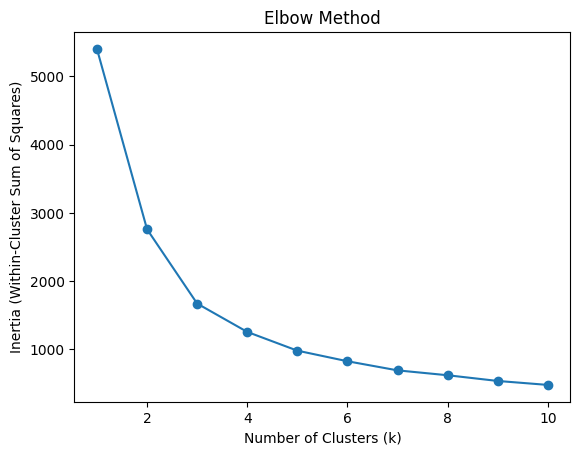

In [132]:
# 엘보우 기법 : 최적의 k값 탐색
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

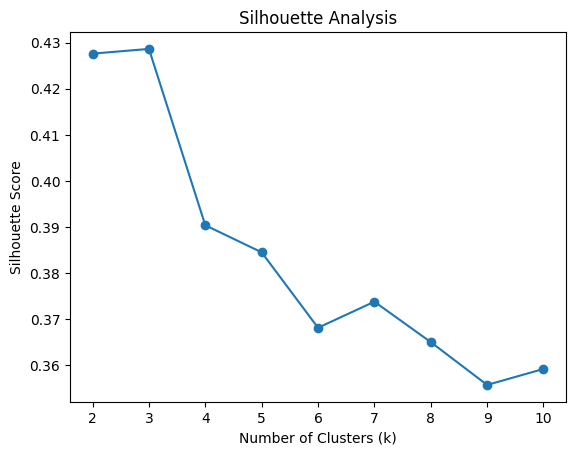

In [135]:
# 실루엣 계수 : 군집 성능평가

from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [136]:
# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [137]:
cycle_stats = category_stats.copy()

In [138]:
cycle_stats['cluster'] = labels

In [139]:
cycle_stats['cluster'].value_counts()

cluster
2    836
3    658
0    569
4    439
1    199
Name: count, dtype: int64

In [140]:
cycle_stats.head()

,Category,median_of_median_cycle,cv_of_median_cycle,cluster
0,"(Appliances, Parts & Accessories, Dryer Parts ...",22.5,1.394163,2
1,"(Appliances, Parts & Accessories, Humidifier P...",182.0,0.517205,1
2,"(Appliances, Parts & Accessories, Refrigerator...",190.5,0.547738,1
3,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",24.0,1.417586,2
4,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",2.0,1.559241,4


In [141]:
cycle_stats.groupby('cluster')[['median_of_median_cycle', 'cv_of_median_cycle']].mean()
# 'median_of_median_cycle' : 일반적인 구매주기가 어떻게 되는지
# 'cv_of_median_cycle' : 구매주기의 개인차가 얼마나 되는지

,median_of_median_cycle,cv_of_median_cycle
cluster,,
0,56.550088,0.696773
1,241.736181,0.580534
2,45.222488,1.159675
3,129.235562,0.778978
4,12.619590,1.730341


In [143]:
# 클러스터별 평균 신뢰구간 하한값 계산 함수
def calc_ci_lower_bound(df, group_col, value_col, z=1.96):
    result = []

    for cluster, group in cycle_stats.groupby(group_col):
        values = group[value_col].dropna()
        mean = np.mean(values)
        std = np.std(values, ddof=1)
        n = len(values)
        lower = mean - z * (std / np.sqrt(n))

        result.append({
            group_col: cluster,
            'mean': mean,
            'std': std,
            'n': n,
            'lower_95CI': lower
        })

    return pd.DataFrame(result)

# 사용 예시
# df = ...  # 데이터프레임 불러오기
ci_df = calc_ci_lower_bound(cycle_stats, group_col='cluster', value_col='median_of_median_cycle')

# 보기 좋게 반올림
ci_df = ci_df.round(2)
print(ci_df)

   cluster    mean    std    n  lower_95CI
0        0   56.55  22.84  569       54.67
1        1  241.74  57.79  199      233.71
2        2   45.22  23.00  836       43.66
3        3  129.24  25.12  658      127.32
4        4   12.62  13.23  439       11.38


In [ ]:
cycle_stats = cycle_stats.merge(ci_df[['cluster','lower_95CI']], on = 'cluster', how = 'inner')
cycle_stats

# 구매주기 계산에 활용된 상품군들의 개수

,Category,median_of_median_cycle,cv_of_median_cycle,cluster,lower_95CI
0,"(Appliances, Parts & Accessories, Dryer Parts ...",22.5,1.394163,2,43.66
1,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",24.0,1.417586,2,43.66
2,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",22.0,1.145062,2,43.66
3,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",63.0,1.064217,2,43.66
4,"(Arts, Crafts & Sewing, Beading & Jewelry Maki...",7.0,1.041367,2,43.66
...,...,...,...,...,...
2696,"(Toys & Games, Toy Figures & Playsets, Playsets)",80.5,0.924294,0,54.67
2697,"(Toys & Games, Vehicles, Trucks)",82.0,0.819970,0,54.67
2698,"(Toys & Games, Vehicles, Vehicle Playsets, Mot...",85.0,0.890395,0,54.67
2699,"(Video Games, Nintendo Switch, Games)",83.0,0.950085,0,54.67


In [162]:
print(cycle_stats.groupby('cluster')['lower_95CI'].first().idxmin())

4


### 군집에 할당되지 못한 상품군들 처리

In [150]:
df # transaction_known에 Category_Origin 붙인 버전

,Order Date,ASIN,Category,Survey ResponseID,Category_Origin
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF,FLASH_MEMORY
1,2018-04-22,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1LYvldXrvEt6Cel,FLASH_MEMORY
2,2020-01-10,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1QoPHtffEy2UzWJ,FLASH_MEMORY
3,2018-02-27,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1q4eVtHN10S5gPB,FLASH_MEMORY
4,2018-10-06,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1rpKvwP7VAtzJqH,FLASH_MEMORY
...,...,...,...,...,...
1593070,2019-06-04,0674362810,"(Books, History, World, Religious, General)",R_zfqnsBzlOAKibzb,ABIS_BOOK
1593071,2019-06-04,B0000Y7L7G,"(Home & Kitchen, Kitchen & Dining, Kitchen Ute...",R_zfqnsBzlOAKibzb,BISS
1593072,2019-09-30,0807057932,"(Books, Politics & Social Sciences, Philosophy...",R_zfqnsBzlOAKibzb,ABIS_BOOK
1593073,2020-03-24,B085WXGMWG,"(Electronics, Computers & Accessories, Compute...",R_zfqnsBzlOAKibzb,CAMCORDER


In [168]:
# Category 기준으로 cluster 정보 병합
df_cluster = df.merge(
    cycle_stats[['Category', 'cluster']],
    on='Category',
    how='left'
)
df_cluster['cluster'] = df_cluster['cluster'].fillna(-1)
df_cluster

,Order Date,ASIN,Category,Survey ResponseID,Category_Origin,cluster
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF,FLASH_MEMORY,3.0
1,2018-04-22,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1LYvldXrvEt6Cel,FLASH_MEMORY,3.0
2,2020-01-10,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1QoPHtffEy2UzWJ,FLASH_MEMORY,3.0
3,2018-02-27,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1q4eVtHN10S5gPB,FLASH_MEMORY,3.0
4,2018-10-06,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1rpKvwP7VAtzJqH,FLASH_MEMORY,3.0
...,...,...,...,...,...,...
1593070,2019-06-04,0674362810,"(Books, History, World, Religious, General)",R_zfqnsBzlOAKibzb,ABIS_BOOK,-1.0
1593071,2019-06-04,B0000Y7L7G,"(Home & Kitchen, Kitchen & Dining, Kitchen Ute...",R_zfqnsBzlOAKibzb,BISS,-1.0
1593072,2019-09-30,0807057932,"(Books, Politics & Social Sciences, Philosophy...",R_zfqnsBzlOAKibzb,ABIS_BOOK,-1.0
1593073,2020-03-24,B085WXGMWG,"(Electronics, Computers & Accessories, Compute...",R_zfqnsBzlOAKibzb,CAMCORDER,3.0


In [157]:
df_cluster['cluster'].value_counts()

cluster
 2.0    424227
-1.0    413457
 3.0    377589
 0.0    160727
 4.0    150726
 1.0     66349
Name: count, dtype: int64

In [170]:
# 1. cluster가 -1인 행 필터링
df_valid = df_cluster[df_cluster['cluster'] != -1]

# 2. Category_Origin과 cluster별 count 계산
count_df = (
    df_valid
    .groupby(['Category_Origin', 'cluster'])
    .size()
    .reset_index(name='count')
)

# 3. Category_Origin별 전체 개수 (분모)
count_df['total'] = count_df.groupby('Category_Origin')['count'].transform('sum')

# 4. 비율 계산
count_df['ratio'] = count_df['count'] / count_df['total']

# 5. 각 Category_Origin에서 비율이 가장 높은 cluster 선택
top_cluster_by_origin = (
    count_df
    .sort_values(['Category_Origin', 'ratio'], ascending=[True, False])
    .drop_duplicates('Category_Origin')
    .reset_index(drop=True)
)

# 6. 보기 좋게 정리
top_cluster_by_origin = top_cluster_by_origin[['Category_Origin', 'cluster', 'count', 'total', 'ratio']]
top_cluster_by_origin['ratio'] = top_cluster_by_origin['ratio'].round(3)
top_cluster_by_origin


,Category_Origin,cluster,count,total,ratio
0,3D_PRINTER,4.0,70,102,0.686
1,ABDOMINAL_EXERCISER,2.0,8,13,0.615
2,ABIS_APPAREL,4.0,3,3,1.000
3,ABIS_BABY_PRODUCT,4.0,1,1,1.000
4,ABIS_BEAUTY,3.0,3,3,1.000
...,...,...,...,...,...
1562,WRITING_PAPER,3.0,95,120,0.792
1563,Wireless Phone Accessory,3.0,1,1,1.000
1564,YARN,4.0,1089,1115,0.977
1565,YO_YO,3.0,1,1,1.000


In [171]:
# 0. lower_95CI가 가장 낮은 cluster 구하기
default_cluster = cycle_stats.groupby('cluster')['lower_95CI'].first().idxmin()

# 1. 대표 cluster가 신뢰할만한 경우만 선택 (ratio ≥ 0.5)
replace_map = top_cluster_by_origin[top_cluster_by_origin['ratio'] >= 0.5][['Category_Origin', 'cluster']]
replace_map = replace_map.rename(columns={'cluster': 'replacement_cluster'})

# 2. cluster == -1인 행만 필터링
mask_unknown = df_cluster['cluster'] == -1
df_unknown = df_cluster[mask_unknown].copy()

# 3. Category_Origin 기준으로 대체값 merge
df_unknown = df_unknown.merge(replace_map, on='Category_Origin', how='left')

# 4. replacement_cluster 존재 여부에 따라 대체 or default
df_cluster.loc[mask_unknown, 'cluster'] = df_unknown['replacement_cluster'].fillna(default_cluster).values

In [172]:
df_cluster.isnull().sum()

Order Date             0
ASIN                   0
Category               0
Survey ResponseID      0
Category_Origin      507
cluster                0
dtype: int64

In [177]:
df_completed = df_cluster.merge(ci_df[['cluster','lower_95CI']], on = 'cluster', how = 'inner')
df_completed

,Order Date,ASIN,Category,Survey ResponseID,Category_Origin,cluster,lower_95CI
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF,FLASH_MEMORY,3.0,127.32
1,2018-04-22,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1LYvldXrvEt6Cel,FLASH_MEMORY,3.0,127.32
2,2020-01-10,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1QoPHtffEy2UzWJ,FLASH_MEMORY,3.0,127.32
3,2018-02-27,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1q4eVtHN10S5gPB,FLASH_MEMORY,3.0,127.32
4,2018-10-06,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1rpKvwP7VAtzJqH,FLASH_MEMORY,3.0,127.32
...,...,...,...,...,...,...,...
1593070,2019-03-05,1475025289,"(Books, Religion & Spirituality, Worship & Dev...",R_zfqnsBzlOAKibzb,ABIS_BOOK,4.0,11.38
1593071,2019-04-10,B001G0LC1E,"(Movies & TV, Featured Categories, DVD, Comedy)",R_zfqnsBzlOAKibzb,PHYSICAL_MOVIE,4.0,11.38
1593072,2019-06-04,0674362810,"(Books, History, World, Religious, General)",R_zfqnsBzlOAKibzb,ABIS_BOOK,4.0,11.38
1593073,2019-06-04,B0000Y7L7G,"(Home & Kitchen, Kitchen & Dining, Kitchen Ute...",R_zfqnsBzlOAKibzb,BISS,4.0,11.38


In [180]:
final = df_completed.rename(columns = {'lower_95CI' : 'Purchase_Cycle', 'ASIN' : 'ASIN/ISBN (Product Code)'}).drop(['Category_Origin', 'cluster'], axis = 1)
final

,Order Date,ASIN/ISBN (Product Code),Category,Survey ResponseID,Purchase_Cycle
0,2018-12-04,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_01vNIayewjIIKMF,127.32
1,2018-04-22,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1LYvldXrvEt6Cel,127.32
2,2020-01-10,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1QoPHtffEy2UzWJ,127.32
3,2018-02-27,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1q4eVtHN10S5gPB,127.32
4,2018-10-06,B0143RTB1E,"(Electronics, Computers & Accessories, Compute...",R_1rpKvwP7VAtzJqH,127.32
...,...,...,...,...,...
1593070,2019-03-05,1475025289,"(Books, Religion & Spirituality, Worship & Dev...",R_zfqnsBzlOAKibzb,11.38
1593071,2019-04-10,B001G0LC1E,"(Movies & TV, Featured Categories, DVD, Comedy)",R_zfqnsBzlOAKibzb,11.38
1593072,2019-06-04,0674362810,"(Books, History, World, Religious, General)",R_zfqnsBzlOAKibzb,11.38
1593073,2019-06-04,B0000Y7L7G,"(Home & Kitchen, Kitchen & Dining, Kitchen Ute...",R_zfqnsBzlOAKibzb,11.38


In [183]:
final.to_csv('Purchase_Cycle.csv', index = False)